MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


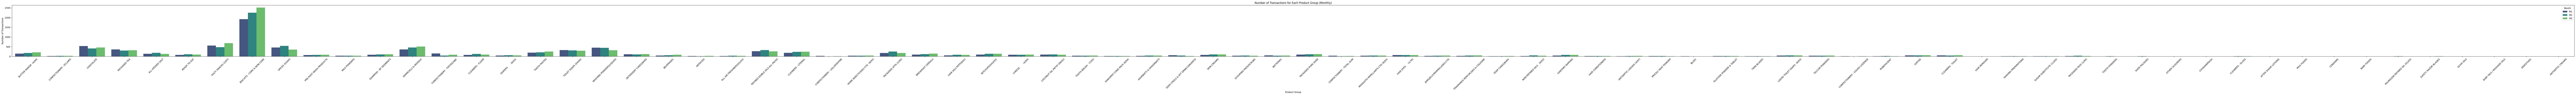

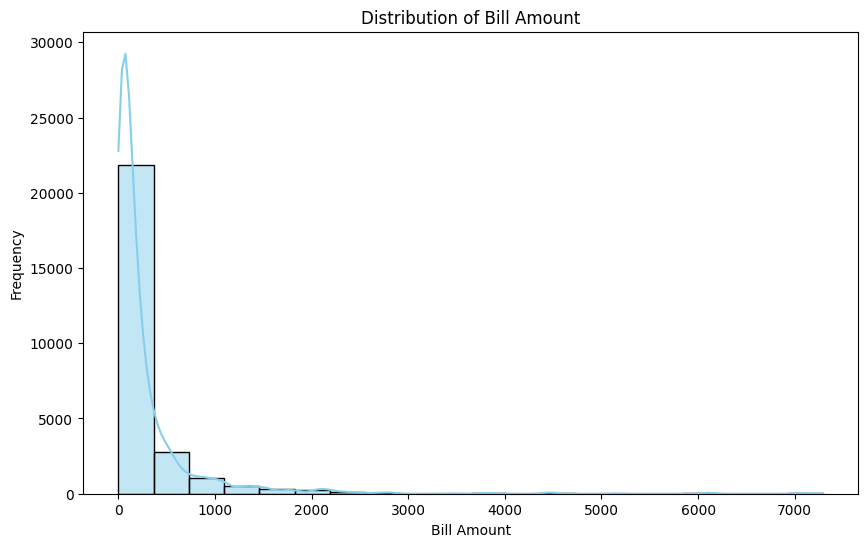

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


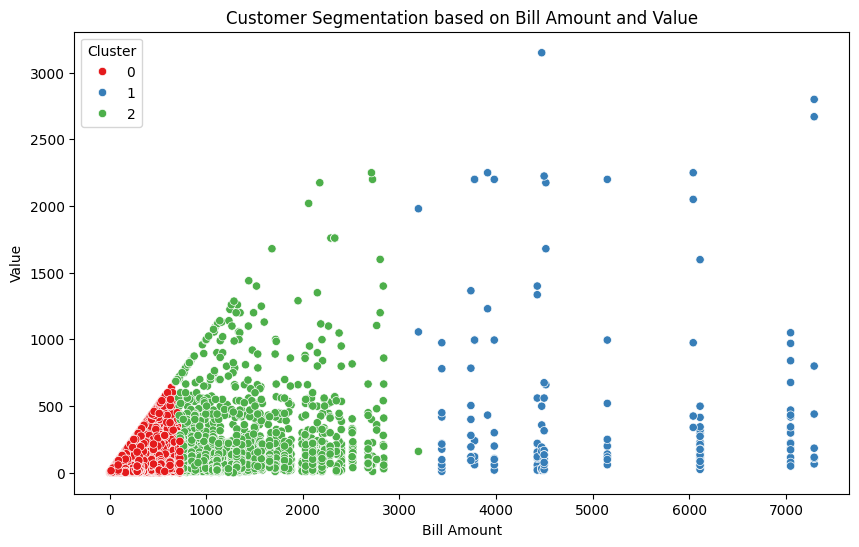

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Hackathon_Working_Data.csv')

# Data Cleaning (if necessary)
# Check for missing values
print(df.isnull().sum())

# Data Exploration
print(df.describe())

# Determine number of unique product groups
unique_groups = df['GRP'].nunique()

# Customer Preferences Analysis with resized plot
plt.figure(figsize=(unique_groups * 2, 6))  # Adjust width based on unique product groups
sns.countplot(data=df, x='GRP', hue='MONTH', palette='viridis')
plt.title('Number of Transactions for Each Product Group (Monthly)')
plt.xlabel('Product Group')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Purchasing Patterns Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['BILL_AMT'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Bill Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.show()

# Customer Segmentation (using K-means clustering as an example)
from sklearn.cluster import KMeans

X = df[['BILL_AMT', 'QTY', 'VALUE']]  # Select relevant features for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BILL_AMT', y='VALUE', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation based on Bill Amount and Value')
plt.xlabel('Bill Amount')
plt.ylabel('Value')
plt.show()